In [1]:
import os
import pandas as pd
import numpy as np

import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr,spearmanr
import warnings
warnings.filterwarnings("ignore")#忽略警告

import datetime
from collections import Counter
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from calendar import day_abbr, month_abbr, mdays
# import holidays
# from fbprophet import Prophet
from sklearn.metrics import mean_squared_error as MSE, r2_score as R2, mean_absolute_percentage_error as MAPE
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import svm
import joblib

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
df=pd.read_csv('./data/preprocessed/data.csv')

In [3]:
df['Date']=pd.to_datetime(df['Date'].astype('str'))
df.set_index('Date',drop=True,inplace=True)

In [4]:
x = df.iloc[:,1:]  # features
x_train=x.loc[:'2022-02-28',:]
x_test=x.loc['2022-03-01':,:]
y = df.loc[:, ['Price']]  # target
y_train=y.loc[:'2022-02-28',:]
y_test=y.loc['2022-03-01':,:]

In [5]:
# Pre-process data
scaler = MinMaxScaler() 
x_train1 = scaler.fit_transform(x_train)
x_test1 = scaler.transform(x_test)
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train)
x_test2 = scaler.transform(x_test)

### KNeighborsRegressor without time offset

In [6]:
x.isnull().any()

GDP          False
netimport    False
EV           False
EG           False
carbon       False
crude        False
gas          False
temp         False
precip       False
wind         False
dtype: bool

In [7]:
def knn(X,Y):    
    for n in X.iloc[:,0:]:
        # Training data
        x = pd.DataFrame(X[str(n)] ) # features
        x_train=x.loc[:'2022-02-28',:]
        X_test=x.loc['2022-03-01':,:]
        y_train=y.loc[:'2022-02-28',:]
        y_test=y.loc['2022-03-01':,:]
        # Train the model
        scaler = StandardScaler() 
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(X_test)
        model = KNeighborsRegressor(n_neighbors=1)
        model.fit(x_train, y_train)

        # Store the fitted values as a time series with the same time index as
        # the training data
        y_pred = pd.Series(model.predict(x_test).T[0], index=X_test.index)
        print(str(n),'\nMSE:',MSE(y_test,y_pred),'\nr2_score:', R2(y_test,y_pred),'\nMAPE:', MAPE(y_test,y_pred),'\n')


In [8]:
knn(x,y)

GDP 
MSE: 825.9579426229509 
r2_score: -0.29321327096678296 
MAPE: 0.8800786153889191 

netimport 
MSE: 669.7055147540985 
r2_score: -0.048566778799053356 
MAPE: 0.8621669865972762 

EV 
MSE: 635.0670344262296 
r2_score: 0.005667147814533258 
MAPE: 0.42779997844965084 

EG 
MSE: 1085.5099262295082 
r2_score: -0.6995972433029864 
MAPE: 0.4195115783066404 

carbon 
MSE: 2933.801259016394 
r2_score: -3.5934914197816834 
MAPE: 1.659676072670778 

crude 
MSE: 1087.2575557377052 
r2_score: -0.702333529929829 
MAPE: 0.42343003978625626 

gas 
MSE: 968.091780327869 
r2_score: -0.5157540998493351 
MAPE: 0.901935190937606 

temp 
MSE: 1354.621142622951 
r2_score: -1.1209482327986877 
MAPE: 0.8988158331156054 

precip 
MSE: 979.0378000000001 
r2_score: -0.5328924275701272 
MAPE: 0.8861840904336274 

wind 
MSE: 748.1986147540982 
r2_score: -0.17146446324648146 
MAPE: 0.7378739728123878 



In [9]:
xtrain=x_train.copy()
xtest=x_test.copy()
ytrain=y_train.copy()
ytest=y_test.copy()

In [10]:
X_train=xtrain.loc[:,['EV','netimport']]
X_test=xtest.loc[:,['EV','netimport']]
# Train the model
scaler = StandardScaler() 
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train, ytrain)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X_test).T[0], index=xtest.index)
print('MSE:',MSE(ytest,y_pred),'\nr2_score:', R2(ytest,y_pred),'\nMAPE:', MAPE(ytest,y_pred),'\n')

MSE: 633.1804344262295 
r2_score: 0.008621022377756415 
MAPE: 0.3587153266753301 



In [11]:
y_pred.name='Price_pred'

In [12]:
ytest.name='Price_true'

In [13]:
res=pd.concat([X_test,ytest,y_pred],axis=1)

In [14]:
res

,EV,netimport,Price,Price_pred
Date,,,,
2022-03-01,26.068586,-24.325249,13.68,15.13
2022-03-02,25.936845,-24.314318,13.28,15.13
2022-03-03,25.804540,-24.303359,20.63,15.13
2022-03-04,25.671671,-24.292371,23.72,15.13
2022-03-05,25.538237,-24.281355,14.89,15.13
...,...,...,...,...
2022-04-26,17.801233,-23.672716,23.94,41.49
2022-04-27,17.636705,-23.660389,43.43,40.88
2022-04-28,17.471570,-23.648040,19.30,41.08


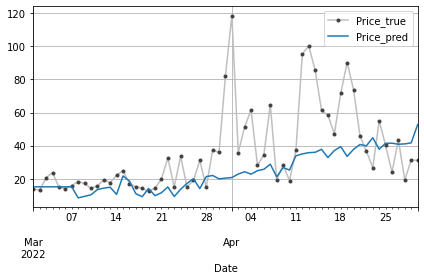

In [15]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
    linewidth=1.5
)
ytest.columns=['Price_true']
ytest.plot(**plot_params)
y_pred.plot(label='Price_pred')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()

### Knn regression with time offset

#### autoregression

In [16]:
shift=1
Df=df.copy()
Df['Lag_1'] = Df['Price'].shift(shift)
Df = Df.reindex(columns=['Price', 'Lag_1'])
X = Df.loc[:, ['Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
y = Df.loc[:, ['Price']]  # create the target
y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target

In [17]:
y

,Price
Date,
2019-01-02,42.65
2019-01-03,51.90
2019-01-04,50.85
2019-01-05,50.72
2019-01-06,51.02
...,...
2022-04-26,23.94
2022-04-27,43.43
2022-04-28,19.30


In [18]:
def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)

In [19]:
def knnshift():  
    for shift in range(1,32):
        Df=df.copy()
        X=make_lags(pd.DataFrame(df.Price), lags=shift).dropna()
        y=pd.DataFrame(df.Price)
        y, X = y.align(X, join='inner', axis=0)
        
        x_train=X.loc[:'2022-02-28',:]
        x_test=X.loc['2022-03-01':,:]
        
        scaler = MinMaxScaler() 
        xtrain = scaler.fit_transform(x_train)
        xtest = scaler.transform(x_test)
        
        y_train=y.loc[:'2022-02-28',:]
        y_test=y.loc['2022-03-01':,:]
        model = KNeighborsRegressor(n_neighbors=1)
        model.fit(xtrain, y_train)

        y_pred = pd.Series(model.predict(xtest).T[0], index=x_test.index)
        print('MSE:',MSE(ytest,y_pred),'\nr2_score:', R2(ytest,y_pred),'\nMAPE:', MAPE(ytest,y_pred),'\n')

In [20]:
knnshift()

MSE: 859.2644606557377 
r2_score: -0.34536172660474374 
MAPE: 0.49500040165347897 

MSE: 320.3399393442622 
r2_score: 0.4984395216721016 
MAPE: 0.41563440495678 

MSE: 445.9314786885245 
r2_score: 0.30179918804280204 
MAPE: 0.37868584357401935 

MSE: 364.78980983606544 
r2_score: 0.4288437717599347 
MAPE: 0.4335920324042017 

MSE: 499.19431147540985 
r2_score: 0.21840486654678792 
MAPE: 0.4338208399794604 

MSE: 509.76698360655746 
r2_score: 0.20185109400703727 
MAPE: 0.3853878945149656 

MSE: 555.2723344262293 
r2_score: 0.13060276459075004 
MAPE: 0.4671336066486782 

MSE: 870.0374213114756 
r2_score: -0.36222909353551147 
MAPE: 0.5376695897047175 

MSE: 862.6481393442623 
r2_score: -0.3506595970638515 
MAPE: 0.5763128777444703 

MSE: 849.3841377049182 
r2_score: -0.3298919743303592 
MAPE: 0.5298204825185493 

MSE: 729.3428622950821 
r2_score: -0.14194176232465527 
MAPE: 0.4661546800777888 

MSE: 712.2930459016395 
r2_score: -0.11524663937744206 
MAPE: 0.4975081223919562 

MSE: 718.76

In [21]:
Df=df.copy()
X=make_lags(pd.DataFrame(df.Price), lags=2).dropna()
y=pd.DataFrame(df.Price)
y, X = y.align(X, join='inner', axis=0)

In [22]:
# x_trainl=X.loc['2019-01-02':'2022-01-31',:]
# x_testl=X.loc['2022-02-01':'2022-04-30',:]
# y_trainl=y.loc['2019-01-02':'2022-01-31',:]
# y_testl=y.loc['2022-02-01':'2022-04-30',:]
x_trainl=X.loc[:'2022-02-28',:]
x_testl=X.loc['2022-03-01':,:]
y_trainl=y.loc[:'2022-02-28',:]
y_testl=y.loc['2022-03-01':,:]

In [23]:
model = KNeighborsRegressor(n_neighbors=1)
model.fit(x_trainl, y_trainl)

y_predl = pd.Series(model.predict(x_testl).T[0], index=x_testl.index)

In [24]:
print('MSE:%f, r2 score:%f and MAPE:%f' %(MSE(y_testl,y_predl), R2(y_testl,y_predl),MAPE(y_testl,y_predl)))

MSE:320.339939, r2 score:0.498440 and MAPE:0.415634


residual Mean: 11.987377,Median: 5.100000, skewness 1.605730, kurtosis: 3.273551


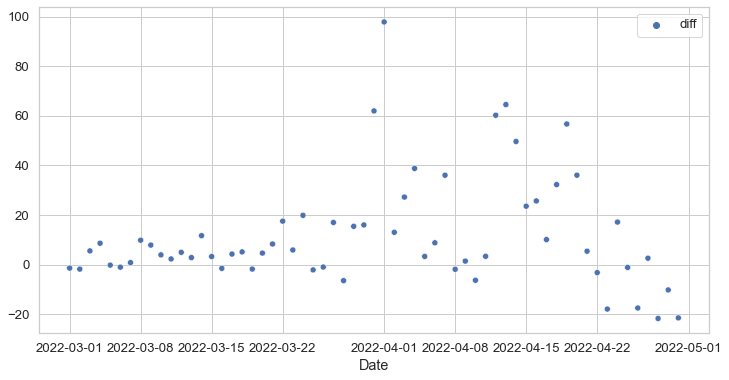

In [25]:
y_pred=pd.DataFrame(y_pred,columns=['Price_pred'])
y_test=pd.DataFrame(y_test,columns=['Price'])
residual=y_test.Price-y_pred.Price_pred
residual=pd.DataFrame(residual,columns=['diff'])
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.set_context('notebook', font_scale=1.2, rc={'lines.linewidth':1}) 
sns.scatterplot(data=residual)
print('residual Mean: %f,Median: %f, skewness %f, kurtosis: %f' 
      %(residual.mean(),residual.median(),residual.skew(),residual.kurt()))

In [26]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
    linewidth=1.5
)

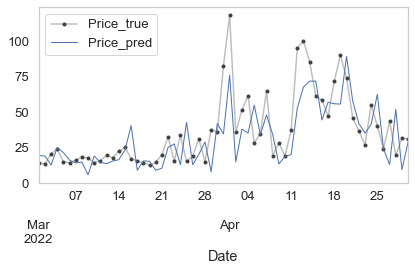

In [27]:
y_testl.columns=['Price_true']
ax = y_testl.plot(**plot_params)
ax = y_predl.plot(label='Price_pred')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()

#### regression with elements

In [28]:
def knn2(Df,n):
    df=Df.copy()
    df['Lag_1'] = df['Price'].shift(1)
    df['Lag '+n] = df[n].shift(1)
    df1 = df.reindex(columns=['Price','Lag'+n, 'Lag_1'])
    X = df.loc[:, ['Lag '+n,'Lag_1']]
    X.dropna(inplace=True)  # drop missing values in the feature set
    y = df.loc[:, ['Price']]  # create the target
    y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target
#     x_train=X.loc['2019-01-02':'2022-01-31',:]
#     x_test=X.loc['2022-02-01':'2022-04-30',:]
#     y_train=y.loc['2019-01-02':'2022-01-31',:]
#     y_test=y.loc['2022-02-01':'2022-04-30',:]
    x_train=X.loc[:'2022-02-28',:]
    x_test=X.loc['2022-03-01':,:]
    y_train=y.loc[:'2022-02-28',:]
    y_test=y.loc['2022-03-01':,:]
    scaler = MinMaxScaler() 
    x_train1 = scaler.fit_transform(x_train)
    x_test1 = scaler.transform(x_test)
    scaler = StandardScaler()
    x_train2 = scaler.fit_transform(x_train)
    x_test2 = scaler.transform(x_test)

    model = KNeighborsRegressor(n_neighbors=1)
    model.fit(x_train1, y_train)

    y_pred = pd.Series(model.predict(x_test1).T[0], index=x_test.index)
    print('MSE:%f, r2 score:%f and MAPE:%f \n' %(MSE(y_test,y_pred), R2(y_test,y_pred),MAPE(y_test,y_pred)))

    fig, ax = plt.subplots()
    ax = sns.regplot(x='Lag '+n, y='Price', data=df, ci=None, scatter_kws=dict(color='0.25'))
    ax.set_title('Lag '+n+' of Power Price')
    
#     plt.plot(x_test['Lag'+n],y_test, '.', color='0.25')
#     plt.plot(x_test['Lag'+n],y_pred)
# #     plt.set_aspect('equal')
#     plt.ylabel('Price')
#     plt.xlabel('Lag '+n)
#     plt.title('Lag Plot of Power Price');
    
    plot_params = dict(
        color="0.75",
        style=".-",
        markeredgecolor="0.25",
        markerfacecolor="0.25",
        legend=False,
        linewidth=1.5
    )
    y_test.plot(**plot_params)
    y_pred.plot()
    plt.grid()
    plt.tight_layout()

MSE:560.676628, r2 score:0.122141 and MAPE:0.413987 



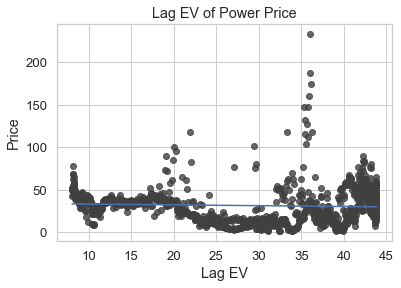

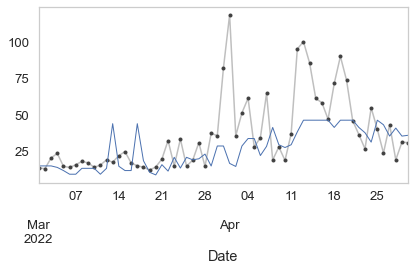

In [29]:
knn2(df,'EV')

In [30]:
def knn3(Df,n):
    df=Df.copy()
    for m in range(1,31):
        df['Lag_1'] = df['Price'].shift(1)
        df['Lag_2'] = df['Price'].shift(2)
        df['Lag '+n] = df[n].shift(m)

        X = df.loc[:, ['Lag '+n,'Lag_1','Lag_2']]
        X.dropna(inplace=True)  # drop missing values in the feature set
        y = df.loc[:, ['Price']]  # create the target
        y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target
    #     x_train=X.loc['2019-01-02':'2022-01-31',:]
    #     x_test=X.loc['2022-02-01':'2022-04-30',:]
    #     y_train=y.loc['2019-01-02':'2022-01-31',:]
    #     y_test=y.loc['2022-02-01':'2022-04-30',:]
        x_train=X.loc[:'2022-02-28',:]
        x_test=X.loc['2022-03-01':,:]
        y_train=y.loc[:'2022-02-28',:]
        y_test=y.loc['2022-03-01':,:]
        scaler = MinMaxScaler() 
        x_train1 = scaler.fit_transform(x_train)
        x_test1 = scaler.transform(x_test)
        scaler = StandardScaler()
        x_train2 = scaler.fit_transform(x_train)
        x_test2 = scaler.transform(x_test)

        model = KNeighborsRegressor(n_neighbors=1)
        model.fit(x_train1, y_train)

        y_pred = pd.Series(model.predict(x_test1).T[0], index=x_test.index)
        print('%d MSE:%f, r2 score:%f and MAPE:%f \n' %(m, MSE(y_test,y_pred), R2(y_test,y_pred),MAPE(y_test,y_pred)))


In [31]:
knn3(df,'precip')

1 MSE:618.574597, r2 score:0.031490 and MAPE:0.471677 

2 MSE:651.812590, r2 score:-0.020552 and MAPE:0.496256 

3 MSE:677.596623, r2 score:-0.060922 and MAPE:0.483419 

4 MSE:698.012910, r2 score:-0.092888 and MAPE:0.515781 

5 MSE:694.560962, r2 score:-0.087483 and MAPE:0.506526 

6 MSE:719.599362, r2 score:-0.126686 and MAPE:0.570338 

7 MSE:672.021597, r2 score:-0.052193 and MAPE:0.496522 

8 MSE:689.857223, r2 score:-0.080119 and MAPE:0.512538 

9 MSE:743.911915, r2 score:-0.164753 and MAPE:0.525780 

10 MSE:671.305616, r2 score:-0.051072 and MAPE:0.583180 

11 MSE:602.103423, r2 score:0.057279 and MAPE:0.483812 

12 MSE:696.393390, r2 score:-0.090352 and MAPE:0.485678 

13 MSE:713.356585, r2 score:-0.116912 and MAPE:0.487793 

14 MSE:669.302128, r2 score:-0.047935 and MAPE:0.542657 

15 MSE:671.834303, r2 score:-0.051900 and MAPE:0.542395 

16 MSE:629.122256, r2 score:0.014975 and MAPE:0.414538 

17 MSE:607.864313, r2 score:0.048259 and MAPE:0.436061 

18 MSE:600.111062, r2 score

In [32]:
Df=df.copy()
Df['Lag_1'] = Df['Price'].shift(1)
Df['Lag_2'] = Df['Price'].shift(2)
Df = Df.reindex(columns=['Price', 'Lag_1','Lag_2']).dropna()

In [33]:
df1=Df.copy()

In [34]:
df1

,Price,Lag_1,Lag_2
Date,,,
2019-01-03,51.90,42.65,22.58
2019-01-04,50.85,51.90,42.65
2019-01-05,50.72,50.85,51.90
2019-01-06,51.02,50.72,50.85
2019-01-07,51.19,51.02,50.72
...,...,...,...
2022-04-26,23.94,40.27,55.01
2022-04-27,43.43,23.94,40.27
2022-04-28,19.30,43.43,23.94


In [35]:
# n='wind'
# df1['Lag '+n] = df[n].shift(5) 
X = df1.iloc[:, 1:-1]
X.dropna(inplace=True)  # drop missing values in the feature set
y = df1.loc[:, ['Price']]  # create the target
y, X = y.align(X, join='inner',axis=0)  # drop corresponding values in target

x_train=X.loc[:'2022-02-28',:]
x_test=X.loc['2022-03-01':,:]
y_train=y.loc[:'2022-02-28',:]
y_test=y.loc['2022-03-01':,:]
# scaler = MinMaxScaler() 
# x_train1 = scaler.fit_transform(x_train)
# x_test1 = scaler.transform(x_test)
# scaler = StandardScaler()
# x_train2 = scaler.fit_transform(x_train)
# x_test2 = scaler.transform(x_test)

model = KNeighborsRegressor(n_neighbors=1)
model.fit(x_train, y_train)
y_pred = pd.Series(model.predict(x_test).T[0], index=x_test.index)
print('MSE:%f, r2 score:%f and MAPE:%f \n' %(MSE(y_test,y_pred), R2(y_test,y_pred),MAPE(y_test,y_pred)))


MSE:854.335751, r2 score:-0.337645 and MAPE:0.494903 



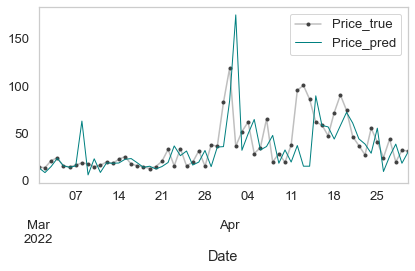

In [36]:
y_test.columns=['Price_true']
ax = y_test.plot(**plot_params)
ax = y_pred.plot(label='Price_pred',color='teal')
plt.grid()
plt.legend(loc='best')
plt.tight_layout()

In [37]:
df2=df1.copy()

In [38]:
df1=df2.copy()